In [120]:
#Importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score, accuracy_score

In [121]:
#Importing dataset and making a copy of it
dataset = pd.read_csv("/content/insurance.csv")
ins = dataset.copy()
ins.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [122]:
#Checking shape of datatset
print(f"No. of rows {ins.shape[0]}")
print(f"No. of coulmns {ins.shape[1]}")

No. of rows 1338
No. of coulmns 7


In [123]:
#Checking Statistical insight on dataset
ins.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [124]:
#Checking information like null values and data types of the dataset
ins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


No null values. but has to check unique values.

In [125]:
#Getting number of unique values for each column
for column in ins.columns:
  print(f'{column} has {ins[column].nunique()} unique values')

age has 47 unique values
sex has 2 unique values
bmi has 548 unique values
children has 6 unique values
smoker has 2 unique values
region has 4 unique values
charges has 1337 unique values


Need to check Outliers in Age and bmi columns

Text(0.5, 1.0, 'Age')

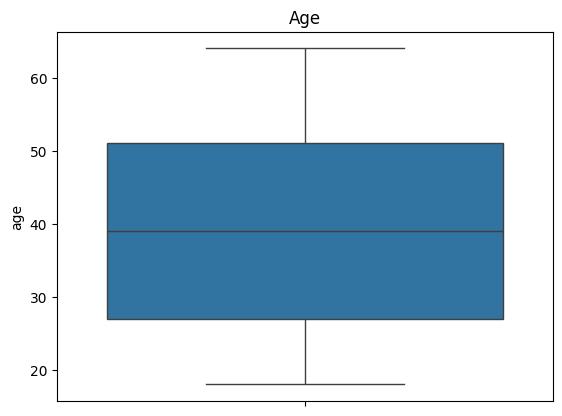

In [127]:
#plotting boxgraph to check outliers

#Checking outliers for age column
sns.boxplot(ins['age'])
plt.title('Age')

No Outliers in age

Text(0.5, 1.0, 'BMI')

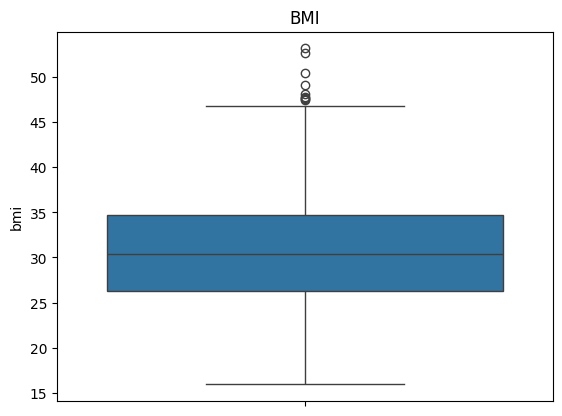

In [128]:
#Checking outliers for age column
sns.boxplot(ins['bmi'])
plt.title('BMI')

BMI columns has outliers over 47. Have to remove outliers.

In [47]:
#Removing outliers from bmi
ins = ins[ins['bmi']<47]

Encoding needed for sex, smoker and region columns

In [129]:
#Encoding sex, smoker, Region columns
ins = pd.get_dummies(ins, columns=['sex', 'smoker', 'region'], drop_first=True)

In [130]:
#Checking first five rows again to see how our dataset looks
ins.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,False,True,False,False,True
1,18,33.770,1,1725.55230,True,False,False,True,False
2,28,33.000,3,4449.46200,True,False,False,True,False
3,33,22.705,0,21984.47061,True,False,True,False,False
4,32,28.880,0,3866.85520,True,False,True,False,False


In [131]:
#Checking Correlation
ins.corr()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
age,1.000000,0.109272,0.042469,0.299008,-0.020856,-0.025019,-0.000407,-0.011642,0.010016
bmi,0.109272,1.000000,0.012759,0.198341,0.046371,0.003750,-0.135996,0.270025,-0.006205
children,0.042469,0.012759,1.000000,0.067998,0.017163,0.007673,0.024806,-0.023066,0.021914
charges,0.299008,0.198341,0.067998,1.000000,0.057292,0.787251,-0.039905,0.073982,-0.043210
sex_male,-0.020856,0.046371,0.017163,0.057292,1.000000,0.076185,-0.011156,0.017117,-0.004184
smoker_yes,-0.025019,0.003750,0.007673,0.787251,0.076185,1.000000,-0.036945,0.068498,-0.036945
region_northwest,-0.000407,-0.135996,0.024806,-0.039905,-0.011156,-0.036945,1.000000,-0.346265,-0.320829
region_southeast,-0.011642,0.270025,-0.023066,0.073982,0.017117,0.068498,-0.346265,1.000000,-0.346265
region_southwest,0.010016,-0.006205,0.021914,-0.043210,-0.004184,-0.036945,-0.320829,-0.346265,1.000000


Charges has less relation with Children and Sex columns.

In [132]:
#Dropping sex and children column as they have little relation with dependent variable
ins = ins.drop(['sex_male', 'children'], axis=1)

In [133]:
#Checking dataset again to see how it looks
ins.head()

,age,bmi,charges,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,16884.92400,True,False,False,True
1,18,33.770,1725.55230,False,False,True,False
2,28,33.000,4449.46200,False,False,True,False
3,33,22.705,21984.47061,False,True,False,False
4,32,28.880,3866.85520,False,True,False,False


In [134]:
#Splitting data into independent and dependent variables
X = ins.drop(['charges'], axis=1)
y = ins['charges']

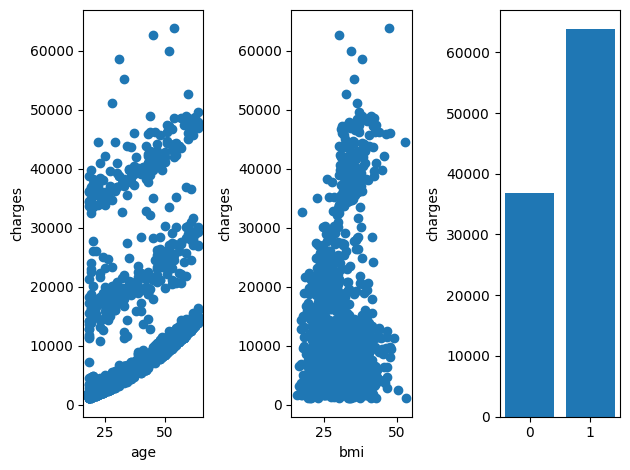

In [138]:
#Plotting graph to check relation of X with y
plt.subplot(1, 3, 1)
plt.scatter(X['age'], y)
plt.xlabel('age')
plt.ylabel('charges')

plt.subplot(1, 3, 2)
plt.scatter(X['bmi'], y)
plt.xlabel('bmi')
plt.ylabel('charges')

plt.subplot(1, 3, 3)
plt.bar(X['smoker_yes'], y)
plt.ylabel('charges')


plt.tight_layout()
plt.show()

From the graph we understand both of them are non linear data. Linear Regression won't be a best option. Best option would be KNN, Decision tree or
Random Forest.

In [139]:
#Splitting data into trainging and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, random_state=40)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(936, 6)
(402, 6)
(936,)
(402,)


In [117]:
#Importing ML algorithms

#Linear Regression
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

#K-nearest neighbrs
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor()

#Decision Tree
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor()

#Random Forse
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100)

models_list = [lr, knn, dt, rf]

In [76]:
#Wrinting a for loop that will iterate through each model and fit training data,
#predict test data and check accuracy for each model.

for model in models_list:
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  model_score = r2_score(y_test, y_pred)
  print(f"{model} model's score is {model_score}")

LinearRegression() model's score is 0.7696460200186367
KNeighborsRegressor() model's score is 0.25603274155168787
DecisionTreeRegressor() model's score is 0.7417011664382118
RandomForestRegressor() model's score is 0.8535641215592857


Creating a model for without dropping sex and children columns

In [112]:
#Creating another copy of dataset
ins2 = dataset.copy()
ins2.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [113]:
#Removing outliers
ins2 = ins2[ins2['bmi']<47]

In [114]:
#One hot encoding sex, smoker region column
ins2 = pd.get_dummies(ins2, columns=['sex','smoker', 'region'], drop_first=True)

In [115]:
#Creating independent and dependent variable from new copy of the dataset
X2 = ins2.drop(['charges'], axis=1)
y2 = ins2['charges']

In [116]:
#splitting into training data and testing data from new copy of dataset
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size= 0.3, random_state=40)
print(X2_train.shape)
print(X2_test.shape)
print(y2_train.shape)
print(y2_test.shape)

(930, 8)
(399, 8)
(930,)
(399,)


In [119]:
#Wrinting a for loop that will iterate through each model and fit training data,
#predict test data and check accuracy for each model.

for model in models_list:
  model.fit(X2_train, y2_train)
  y2_pred = model.predict(X2_test)
  model_score = r2_score(y2_test, y2_pred)
  print(f"{model} model's score is {model_score}")

LinearRegression() model's score is 0.7725819567027973
KNeighborsRegressor() model's score is 0.19087739718116026
DecisionTreeRegressor() model's score is 0.7270807242489037
RandomForestRegressor() model's score is 0.8667170579858692


Hence we see that not removing the children and sex column gives us a better accuracy.